In [13]:
import re
import subprocess
import time
import matplotlib.pyplot as plt

def run_stress_ng(method, size):
    command = f"stress-ng --cache 5 --{method} {size} --timeout 10s --metrics-brief"
    print(command)
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    output, error = process.communicate()
    if error:
        return parse_stress_ng_output(error.decode())

    return parse_stress_ng_output(output.decode())

def parse_stress_ng_output(output):
    print(output)
    pattern = re.compile(f'cache\s+(\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)\s+(\d+\.\d+)')
    match = pattern.search(output)

    print(match)

    if match:
        bogo_ops_value = float(match.group(1))
        return bogo_ops_value
    
    return None

def bogo_ops_graph(method, min_size, max_size):
    sizes = []
    bogo_ops = []

    current_size = min_size

    while current_size <= max_size:
        bogo_ops_value = run_stress_ng(method, str(current_size) + ".0m")

        if bogo_ops_value is not None:
            sizes.append(current_size)
            bogo_ops.append(bogo_ops_value)

        time.sleep(5)
        current_size += 10

    plt.plot(sizes, bogo_ops, marker='o')
    plt.xlabel('L3 cache size in MB')
    plt.ylabel('Bogo Ops')
    plt.title(f'Bogo Ops vs L3 cache size')
    plt.grid(True)
    plt.show()

stress-ng --cache 5 --stream-l3-size 12.0m --timeout 10s --metrics-brief
stress-ng: info:  [4941] setting to a 10 second run per stressor
stress-ng: info:  [4941] dispatching hogs: 5 cache
stress-ng: info:  [4941] successful run completed in 10.00s
stress-ng: info:  [4941] stressor       bogo ops real time  usr time  sys time   bogo ops/s     bogo ops/s
stress-ng: info:  [4941]                           (secs)    (secs)    (secs)   (real time) (usr+sys time)
stress-ng: info:  [4941] cache               244     10.00     23.85      0.30        24.40          10.10

<re.Match object; span=(415, 496), match='cache               244     10.00     23.85      >
stress-ng --cache 5 --stream-l3-size 22.0m --timeout 10s --metrics-brief
stress-ng: info:  [4948] setting to a 10 second run per stressor
stress-ng: info:  [4948] dispatching hogs: 5 cache
stress-ng: info:  [4948] successful run completed in 10.00s
stress-ng: info:  [4948] stressor       bogo ops real time  usr time  sys time   bogo o

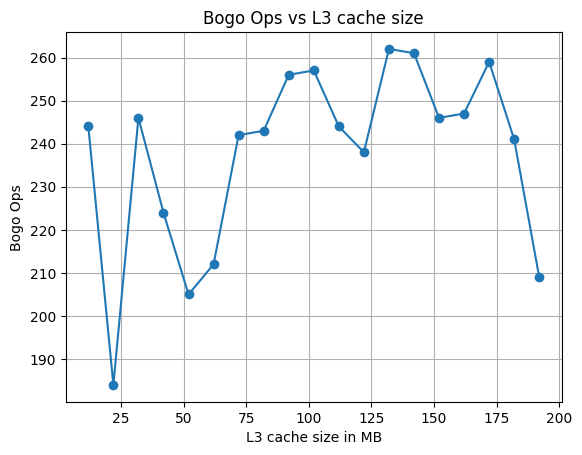

In [14]:
bogo_ops_graph("stream-l3-size", 12, 192)